In [36]:
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def tidlists(transactions):
    tl = defaultdict(set)
    for tid, t in enumerate(transactions):
        for item in t:
            tl[item].add(tid)
    return list(tl.items())
 
class IntersectAll:
    def __and__(self, other):
        return other
IntersectAll = IntersectAll()
 
def eclat(items, minsup=0, minlen=1):
    frequent_itemsets = {(): IntersectAll}
    def recurse(items, prefix):
        while len(items) > 0:
            item, item_tidlist = items.pop()
            l = prefix + (item,)  # l is the (ordered) tuple of items we are looking for
            new_tidlist = frequent_itemsets[prefix] & item_tidlist
            if len(new_tidlist) >= minsup:  # add frequent_itemsets to the new frequent_itemsets
                frequent_itemsets[l] = new_tidlist
             
            # define the new l-conditional database
            new_items = []
            for new_item, _item_tidlist in items:
                new_item_tidlist = _item_tidlist & item_tidlist
                if len(new_item_tidlist) >= minsup:
                    new_items.append((new_item, new_item_tidlist))
             
            # recurse, with l as prefix
            recurse(new_items, l)
     
    recurse(items.copy(), ())
    return {k: len(v) for k, v in frequent_itemsets.items() if len(k) >= minlen}



In [9]:
dataset = [['Eggs', 'Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs'],
           ['Orange', 'Corn', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Orange', 'Eggs'], 
           ['Corn', 'Coke', 'Kidney Beans', 'Ice cream'],
           ['Dill', 'Onion', 'Nutmeg'],
           ['Coke', 'Apple', 'Ice cream']
          ]


In [79]:
tl = tidlists(dataset)
tl = dict(tl)
tl

{'Eggs': {0, 1, 2, 4, 5, 6},
 'Milk': {0, 2, 3, 6},
 'Onion': {0, 1, 4, 8},
 'Nutmeg': {0, 1, 8},
 'Kidney Beans': {0, 2, 3, 4, 7},
 'Yogurt': {0, 1, 3, 5},
 'Dill': {1, 8},
 'Apple': {2, 6, 9},
 'Unicorn': {3},
 'Corn': {3, 4, 5, 7},
 'Ice cream': {4, 7, 9},
 'Orange': {5, 6},
 'Coke': {7, 9}}

In [43]:
result = eclat(tl,minsup=2,minlen=2)
result

{('Coke', 'Ice cream'): 2,
 ('Orange', 'Eggs'): 2,
 ('Ice cream', 'Corn'): 2,
 ('Ice cream', 'Corn', 'Kidney Beans'): 2,
 ('Ice cream', 'Kidney Beans'): 2,
 ('Corn', 'Yogurt'): 2,
 ('Corn', 'Kidney Beans'): 3,
 ('Corn', 'Eggs'): 2,
 ('Apple', 'Milk'): 2,
 ('Apple', 'Milk', 'Eggs'): 2,
 ('Apple', 'Eggs'): 2,
 ('Dill', 'Nutmeg'): 2,
 ('Dill', 'Nutmeg', 'Onion'): 2,
 ('Dill', 'Onion'): 2,
 ('Yogurt', 'Kidney Beans'): 2,
 ('Yogurt', 'Kidney Beans', 'Milk'): 2,
 ('Yogurt', 'Nutmeg'): 2,
 ('Yogurt', 'Nutmeg', 'Onion'): 2,
 ('Yogurt', 'Nutmeg', 'Onion', 'Eggs'): 2,
 ('Yogurt', 'Nutmeg', 'Eggs'): 2,
 ('Yogurt', 'Onion'): 2,
 ('Yogurt', 'Onion', 'Eggs'): 2,
 ('Yogurt', 'Milk'): 2,
 ('Yogurt', 'Eggs'): 3,
 ('Kidney Beans', 'Onion'): 2,
 ('Kidney Beans', 'Onion', 'Eggs'): 2,
 ('Kidney Beans', 'Milk'): 3,
 ('Kidney Beans', 'Milk', 'Eggs'): 2,
 ('Kidney Beans', 'Eggs'): 3,
 ('Nutmeg', 'Onion'): 3,
 ('Nutmeg', 'Onion', 'Eggs'): 2,
 ('Nutmeg', 'Eggs'): 2,
 ('Onion', 'Eggs'): 3,
 ('Milk', 'Eggs'): 3}

In [44]:
#Support:
keys=result.values()
titles=result.keys()
list_titles= []
for item in titles:
    list_titles.append('_'.join(item))

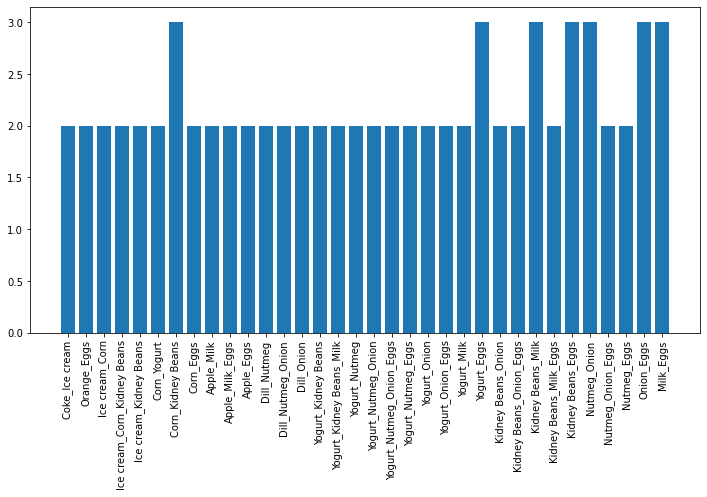

In [49]:
plt.figure(figsize=(12,6))
plt.bar(list_titles,keys)
plt.xticks(rotation=90);

In [95]:
#Confident for 2 item:
confident_2its = []
for item in titles:
    if len(item) == 2:
        confident_2its.append(('_'.join(item),result[item],len(tl[item[0]]),len(tl[item[1]]),round(result[item]/len(tl[item[0]]),ndigits=2)))
        confident_2its.append(('_'.join(item[::-1]),result[item],len(tl[item[::-1][0]]),len(tl[item[::-1][1]]),round(result[item]/len(tl[item[::-1][0]]),ndigits=2)))
    else:
        pass

In [97]:
confident_table = pd.DataFrame(confident_2its,columns=['items','Transaction_AB','TransactionA','TransactionB','Conficence_AB'])
confident_table

,items,Transaction_AB,TransactionA,TransactionB,Conficence_AB
0,Coke_Ice cream,2,2,3,1.00
1,Ice cream_Coke,2,3,2,0.67
2,Orange_Eggs,2,2,6,1.00
3,Eggs_Orange,2,6,2,0.33
4,Ice cream_Corn,2,3,4,0.67
5,Corn_Ice cream,2,4,3,0.50
6,Ice cream_Kidney Beans,2,3,5,0.67
7,Kidney Beans_Ice cream,2,5,3,0.40
8,Corn_Yogurt,2,4,4,0.50
9,Yogurt_Corn,2,4,4,0.50


In [99]:
#Lift:
confident_table['Lift_AB'] = confident_table['Conficence_AB']/(confident_table['TransactionB']/len(dataset))

In [100]:
confident_table

,items,Transaction_AB,TransactionA,TransactionB,Conficence_AB,Lift_AB
0,Coke_Ice cream,2,2,3,1.00,3.333333
1,Ice cream_Coke,2,3,2,0.67,3.350000
2,Orange_Eggs,2,2,6,1.00,1.666667
3,Eggs_Orange,2,6,2,0.33,1.650000
4,Ice cream_Corn,2,3,4,0.67,1.675000
5,Corn_Ice cream,2,4,3,0.50,1.666667
6,Ice cream_Kidney Beans,2,3,5,0.67,1.340000
7,Kidney Beans_Ice cream,2,5,3,0.40,1.333333
8,Corn_Yogurt,2,4,4,0.50,1.250000
9,Yogurt_Corn,2,4,4,0.50,1.250000
